In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale, StandardScaler

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import seaborn as sns


In [12]:
raw_data = pd.read_csv('./data/ordered_molecules.csv')

In [13]:
raw_data.tail()

,time,molecule,px,py,pz,ax,ay,az
255995,1999,124,10.61230,9.20293,8.07598,-1.025038,3.645025,-1.280867
255996,1999,125,12.28148,7.63805,8.68123,3.634594,-3.766582,-2.338953
255997,1999,126,6.03300,12.81292,6.05135,2.307742,5.650190,5.404642
255998,1999,127,9.50306,10.44102,9.99912,1.395564,-1.232665,-0.779073
255999,1999,128,12.01283,11.18948,11.90577,-0.730089,-1.992210,-0.056095


In [14]:
def generate_data(t):
    df = raw_data.loc[raw_data['time'] == t]
    
    px_plus = df.iloc[:,2] + 12.9168567587204
    px_origin = df.iloc[:,2]
    px_minus = df.iloc[:,2] - 12.9168567587204
    
    py_plus = df.iloc[:,3] + 12.9168567587204
    py_origin = df.iloc[:,3]
    py_minus = df.iloc[:,3] - 12.9168567587204
    
    pz_plus = df.iloc[:,4] + 12.9168567587204
    pz_origin = df.iloc[:,4]
    pz_minus = df.iloc[:,4] - 12.9168567587204
    
    #plus
    data_mod_1 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_2 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_3 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_4 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_5 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_6 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_7 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #minus
    data_mod_8 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_9 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_10 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_11 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_12 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_13 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_14 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    #plus + minus
    data_mod_15 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_16 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_17 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_18 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    data_mod_19 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_20 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #3
    data_mod_21 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_22 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_23 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_24 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_25 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_26 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_27 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    combined_df = pd.concat([data_mod_27.reset_index(drop=True), data_mod_1.reset_index(drop=True), data_mod_2.reset_index(drop=True), data_mod_3.reset_index(drop=True), 
                           data_mod_4.reset_index(drop=True), data_mod_5.reset_index(drop=True), data_mod_6.reset_index(drop=True), data_mod_7.reset_index(drop=True), 
                           data_mod_8.reset_index(drop=True), data_mod_9.reset_index(drop=True), data_mod_10.reset_index(drop=True), data_mod_11.reset_index(drop=True),
                           data_mod_12.reset_index(drop=True), data_mod_13.reset_index(drop=True), data_mod_14.reset_index(drop=True), data_mod_15.reset_index(drop=True),
                           data_mod_16.reset_index(drop=True), data_mod_17.reset_index(drop=True), data_mod_18.reset_index(drop=True), data_mod_19.reset_index(drop=True),
                           data_mod_20.reset_index(drop=True), data_mod_21.reset_index(drop=True), data_mod_22.reset_index(drop=True), data_mod_23.reset_index(drop=True),
                           data_mod_24.reset_index(drop=True), data_mod_25.reset_index(drop=True), data_mod_26.reset_index(drop=True)], axis = 0, ignore_index = True)
    
    
    df_acc = pd.concat([df.iloc[:,5:].reset_index(drop=True), df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True)], axis = 0, ignore_index = True)
    
    mol_num = range(1,combined_df.shape[0]+1)
    combined_df['molecule'] = mol_num
    
    result_df = pd.concat([df_acc.reset_index(drop=True), combined_df.reset_index(drop=True)], axis = 1, ignore_index = True)
    result_df.columns = ["ax", "ay", "az", "px", "py", "pz", "molecule"]
    
    result_df = result_df[["molecule", "px", "py", "pz", "ax", "ay", "az"]]
    return(result_df)

In [15]:
generate_data(0).tail()

,molecule,px,py,pz,ax,ay,az
3451,3452,-2.282917,23.957887,-8.189287,2.826494,0.120729,3.561412
3452,3453,-3.424287,22.244557,-6.353907,0.540960,2.726446,-0.040251
3453,3454,-1.724537,24.117957,-5.084297,0.363945,-0.033185,0.824533
3454,3455,-2.970927,22.454267,-3.323367,-0.612577,1.925591,-0.319277
3455,3456,-1.005977,24.060017,-1.581507,-3.718706,0.246769,-1.344216


In [16]:
def find_neighbors(t):
    df_gen = generate_data(t)
    
    k = 9
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(df_gen)
    distances, indices = nbrs.kneighbors(df_gen)
    
    return(k, df_gen, indices[:128], distances[:128])

In [17]:
def make_df(t):
    t_df = raw_data.loc[raw_data['time']==t]
    t_plus_1_df = raw_data.loc[raw_data['time']==t+1]
    
    acc_t_plus_1 = t_plus_1_df.iloc[:,5:]
    delta_position = pd.DataFrame(np.array(t_plus_1_df.iloc[:,2:5]) - np.array(t_df.iloc[:,2:5]), columns=['dlt_px','dlt_py','dlt_pz'])
    
    k, df_gen, indices, dist = find_neighbors(t)
    
    li = []
    for i in range(0,indices.shape[0]):
        rows = []
        for j in range(1,k):
            row = df_gen.loc[df_gen['molecule'] == (indices[i][j]+1)]
            row_rp = row.iloc[:,1:4] - t_df.iloc[i,2:5]
            row_acc = pd.DataFrame(np.array(row.iloc[:,4:]) / dist[i][j])
            
            row_combined = np.array(pd.concat([row_rp.reset_index(drop=True), row_acc.reset_index(drop=True)], axis = 1))
            rows.append(row_combined)
        
        li.append(np.array(rows).ravel())
    
    acc_df = t_df[['time','ax','ay','az']]
    neighbors_df = pd.DataFrame(li)
    acc_t_plus_1.columns = ['next_ax','next_ay','next_az']
    
    df_made = pd.concat([acc_df.reset_index(drop=True), neighbors_df.reset_index(drop=True), 
                         delta_position.reset_index(drop=True), acc_t_plus_1.reset_index(drop=True)], axis = 1)
    
    return(df_made)

In [18]:
make_df(8)

,time,ax,ay,az,0,1,2,3,4,5,...,44,45,46,47,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
0,8,0.993316,-1.608745,-4.632976,0.60041,1.74026,4.53256,0.424670,0.011176,-0.379403,...,7.87561,-0.034834,-0.014485,-0.220129,0.00304,-0.00143,-0.00564,0.952440,-1.614962,-4.611806
1,8,-5.278592,-1.921429,1.037591,-1.82682,-1.45555,-1.22753,0.111368,-0.180368,-0.519437,...,0.26704,0.404901,-0.161682,-0.271257,-0.00256,0.00738,-0.00288,-5.377134,-2.091858,1.061816
2,8,3.890088,-2.303824,3.603893,0.45181,-9.18129,-0.67836,0.043235,-0.142589,0.468279,...,6.92593,0.056253,0.017439,0.036473,0.00431,-0.00097,-0.00776,3.832552,-2.201074,3.797141
3,8,2.803160,0.073771,-2.504362,0.21147,-0.55516,3.19130,0.358145,0.621298,-0.512257,...,3.34305,-0.048730,-0.020263,-0.307940,0.00630,0.00281,0.00293,2.634782,-0.046104,-2.536512
4,8,-1.272802,-0.410119,4.397561,-0.16479,3.30615,-3.97936,0.066211,-0.218361,0.717123,...,1.95673,0.122582,0.212652,-0.175330,-0.00108,-0.00157,0.00706,-1.200160,-0.349542,4.233268
5,8,1.778404,3.085117,-2.543663,-0.21147,0.55516,-3.19130,0.564516,0.014856,-0.504342,...,3.30928,0.055254,-0.019059,-0.002583,0.00621,0.00183,0.00481,1.624509,3.076142,-2.599706
6,8,-2.186386,2.280947,-0.936787,0.09342,-9.40347,3.35587,-0.053127,0.042732,-0.156854,...,-4.53001,0.212047,0.005580,-0.189444,-0.00415,-0.00173,0.00197,-2.063182,2.408010,-1.067146
7,8,-3.616041,-0.158436,0.173795,-1.75293,1.34721,1.46901,-0.121471,0.097704,-0.358636,...,-1.88686,-0.189745,0.197951,-0.081299,0.00627,-0.00165,0.00161,-3.691556,-0.124337,0.163242
8,8,-0.557731,0.448603,-1.646666,1.75293,-1.34721,-1.46901,-0.787557,-0.034507,0.037852,...,-3.35587,-0.208265,0.217273,-0.089234,0.00059,-0.00208,0.00379,-0.546672,0.420299,-1.806878
9,8,6.224426,-2.485486,-4.169951,-0.44333,-3.16193,3.03799,0.320591,0.008437,-0.286418,...,10.92387,-0.040851,0.032858,-0.120610,0.00128,-0.00449,-0.00639,6.105655,-2.378516,-4.007793


In [9]:
#make whole dataset
final_data = make_df(1)

for t in range(2,1999):
    df_part = make_df(t)
    final_data = pd.concat([final_data, df_part], axis = 0, ignore_index=True)

In [19]:
final_data.head()

NameError: name 'final_data' is not defined

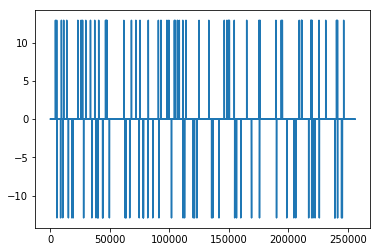

In [192]:
plt.plot(final_data['dlt_px'])

In [11]:
##########################################################
################# save dataframe #########################
#final_data.to_csv('./data/KNN_8_P_A.csv', index = False)

## **Read Data**

In [100]:
final_data = pd.read_csv('./data/KNN_8_P_A.csv')

In [101]:
final_data_new = final_data.loc[final_data['time'] >= 1]

In [102]:
final_data_new.head()

,time,ax,ay,az,0,1,2,3,4,5,...,44,45,46,47,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
128,1,1.173813,-1.541970,-4.631340,0.58104,1.71393,4.47710,0.540902,0.116529,-0.321969,...,7.75706,-0.063904,0.044628,-0.165633,0.00257,-0.00083,-0.00379,1.161030,-1.555290,-4.646868
129,1,-4.672077,-0.805457,1.064703,-1.85620,-1.39515,-1.21694,0.135509,-0.178010,-0.534658,...,7.79930,-0.184371,0.096855,-0.003260,-0.00066,0.00771,-0.00318,-4.748614,-0.954831,1.043398
130,1,4.432026,-2.609304,2.213726,0.50168,-9.17396,-0.69060,-0.028488,-0.126268,0.348886,...,6.84411,0.092039,0.072649,0.040942,0.00270,-0.00004,-0.00867,4.338581,-2.607360,2.413316
131,1,3.846336,0.828634,-2.289510,0.21053,-0.54445,3.17839,0.628549,0.673757,-0.475000,...,3.27996,-0.086885,0.060676,-0.225195,0.00495,0.00258,0.00373,3.717136,0.732364,-2.319824
132,1,-1.790789,-0.845025,5.255177,-0.14392,3.30663,-3.89209,-0.047210,-0.209251,0.578177,...,1.96178,0.185862,0.199230,-0.140458,-0.00050,-0.00130,0.00513,-1.717830,-0.783814,5.165356


In [103]:
dlt_for_x = final_data.loc[final_data['time'] <= 1997][['dlt_px','dlt_py','dlt_pz']]
dlt_for_x.columns = ['past_dlt_px','past_dlt_py','past_dlt_pz']

In [104]:
final_data_new.insert(loc = 1, column = 'past_dlt_px', value = np.array(dlt_for_x.iloc[:,0]))
final_data_new.insert(loc = 2, column = 'past_dlt_py', value = np.array(dlt_for_x.iloc[:,1]))
final_data_new.insert(loc = 3, column = 'past_dlt_pz', value = np.array(dlt_for_x.iloc[:,2]))

final_data_new = final_data_new.reset_index(drop=True)

In [132]:
final_data_new.tail()

,time,past_dlt_px,past_dlt_py,past_dlt_pz,ax,ay,az,0,1,2,...,44,45,46,47,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
255739,1998,-0.00659,0.00343,0.00291,-1.117306,3.729599,-1.309010,-1.11728,1.23271,1.93306,...,-7.90545,-0.505162,-0.084367,-0.224528,-0.00663,0.00362,0.00284,-1.025038,3.645025,-1.280867
255740,1998,-0.00393,0.00253,0.00630,3.562240,-3.790684,-2.208148,-2.78356,2.79630,1.33114,...,-7.15338,0.396960,-0.242948,0.197936,-0.00373,0.00233,0.00617,3.634594,-3.766582,-2.338953
255741,1998,-0.00030,0.00338,0.00239,1.966739,5.790018,5.545910,4.58574,-3.60994,2.02446,...,-0.80648,-0.077386,0.048067,0.211089,-0.00019,0.00367,0.00267,2.307742,5.650190,5.404642
255742,1998,0.00134,0.00907,-0.00705,1.619934,-1.090169,-0.924991,2.50430,0.75071,1.88872,...,-3.95752,0.176852,0.520645,0.498695,0.00141,0.00900,-0.00708,1.395564,-1.232665,-0.779073
255743,1998,0.00694,0.00686,0.01088,-0.597181,-1.916267,0.042068,-2.50430,-0.75071,-1.88872,...,-7.81960,-0.494961,0.294826,-0.059732,0.00688,0.00675,0.01085,-0.730089,-1.992210,-0.056095


In [105]:
exc_x_idx, = np.where(abs(final_data_new['dlt_px']) > 12)
exc_y_idx, = np.where(abs(final_data_new['dlt_py']) > 12)
exc_z_idx, = np.where(abs(final_data_new['dlt_pz']) > 12)

exc_idx = set(exc_x_idx) | set(exc_y_idx) | set(exc_z_idx)

final_data_modi = final_data_new.loc[final_data_new.index.drop(list(exc_idx))].reset_index(drop=True)

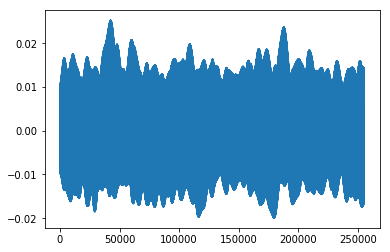

In [106]:
plt.plot(final_data_modi['dlt_px'])

In [107]:
x_train = final_data_modi.loc[(final_data_modi['time'] >= 1) & (final_data_modi['time'] <= 1399)].iloc[:,1:55]
y_train = final_data_modi.loc[(final_data_modi['time'] >= 1) & (final_data_modi['time'] <= 1399)].iloc[:,55:]

x_test = final_data_modi.loc[(final_data_modi['time'] >= 1400) & (final_data_modi['time'] <= 1998)].iloc[:,1:55]
y_test = final_data_modi.loc[(final_data_modi['time'] >= 1400) & (final_data_modi['time'] <= 1998)].iloc[:,55:]

/usr/local/anaconda/envs/env_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


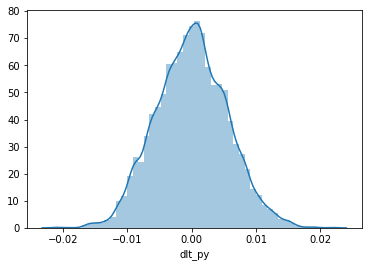

In [108]:
sns.distplot(y_test['dlt_py'])

/usr/local/anaconda/envs/env_py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


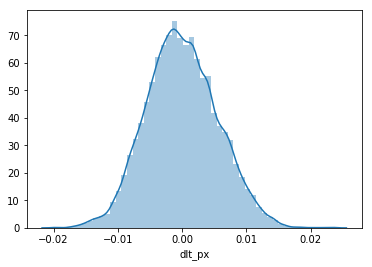

In [109]:
sns.distplot(y_test['dlt_px'])

In [133]:
y_train.tail()

,dlt_px,dlt_py,dlt_pz,next_ax,next_ay,next_az
178831,-0.00096,-0.00974,0.00342,0.446875,4.912969,4.631155
178832,0.00226,-0.00185,-0.00580,-3.684306,5.394142,0.437363
178833,0.01216,-0.00043,-0.01277,-0.798781,-0.173781,-1.363776
178834,0.01254,0.00124,0.00339,-0.534207,2.387609,-2.662668
178835,-0.00194,-0.00081,-0.00392,1.001537,-4.037463,-2.344189


In [111]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

#Regularization
x_train_scaled = pd.DataFrame(x_scaler.transform(x_train))
y_train_scaled = pd.DataFrame(y_scaler.transform(y_train), columns=['dlt_x','dlt_y','dlt_z','ax_next','ay_next','az_next'])

x_test_scaled = pd.DataFrame(x_scaler.transform(x_test))
y_test_scaled = pd.DataFrame(y_scaler.transform(y_test), columns=['dlt_x','dlt_y','dlt_z','ax_next','ay_next','az_next'])


In [144]:
#model 1
model_1 = Sequential()

model_1.add(Dense(128, input_dim=54, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.1)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.1)))
model_1.add(BatchNormalization())

model_1.add(Dense(128, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.1)))
model_1.add(BatchNormalization())

model_1.add(Dense(6, activation='linear', kernel_initializer = 'glorot_normal', kernel_regularizer = regularizers.l2(0.1)))

In [145]:
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min')
model_check_point = ModelCheckpoint('./model/KNN_8_P_A.h5', monitor = 'val_loss', verbose=2, save_best_only=True)

callback_list = [model_check_point, early_stop]

In [146]:
hist_1 = model_1.fit(x_train_scaled, y_train_scaled, epochs=150, batch_size=64, validation_data=(x_test_scaled, y_test_scaled), callbacks = callback_list)


Train on 178836 samples, validate on 76581 samples
Epoch 1/150
178836/178836 [==============================] - 15s 82us/step - loss: 2.4802 - mean_squared_error: 0.5664 - val_loss: 0.5614 - val_mean_squared_error: 0.5359

Epoch 00001: val_loss improved from inf to 0.56140, saving model to ./model/KNN_8_P_A.h5
Epoch 2/150
178836/178836 [==============================] - 13s 72us/step - loss: 0.5580 - mean_squared_error: 0.5323 - val_loss: 0.5649 - val_mean_squared_error: 0.5409

Epoch 00002: val_loss did not improve from 0.56140
Epoch 3/150
178836/178836 [==============================] - 13s 70us/step - loss: 0.5498 - mean_squared_error: 0.5292 - val_loss: 0.5606 - val_mean_squared_error: 0.5397

Epoch 00003: val_loss improved from 0.56140 to 0.56062, saving model to ./model/KNN_8_P_A.h5
Epoch 4/150
178836/178836 [==============================] - 13s 71us/step - loss: 0.5449 - mean_squared_error: 0.5275 - val_loss: 0.5486 - val_mean_squared_error: 0.5334

Epoch 00004: val_loss improv

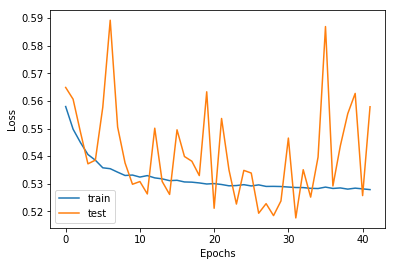

In [147]:
# plot history
plt.plot(hist_1.history['loss'][1:], label='train')
plt.plot(hist_1.history['val_loss'][1:], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [148]:
model = load_model('./model/KNN_8_P_A.h5')

In [149]:
#Training error Check
y_pred = pd.DataFrame(model.predict(x_test_scaled), columns=['dlt_x','dlt_y','dlt_z','ax_pred','ay_pred','az_pred'])

In [150]:
del_x_idx, = np.where(abs(y_test_scaled['dlt_x'] - y_pred.iloc[:,0]) > 12)
del_y_idx, = np.where(abs(y_test_scaled['dlt_y'] - y_pred.iloc[:,1]) > 12)
del_z_idx, = np.where(abs(y_test_scaled['dlt_z'] - y_pred.iloc[:,2]) > 12)

del_idx = set(del_x_idx) | set(del_y_idx) | set(del_z_idx)

y_test_scaled = y_test_scaled.loc[y_test_scaled.index.drop(list(del_idx))].reset_index(drop=True)
y_pred = y_pred.loc[y_pred.index.drop(list(del_idx))].reset_index(drop=True)

In [151]:
y_test_inverse = pd.DataFrame(y_scaler.inverse_transform(y_test_scaled))
y_pred_inverse = pd.DataFrame(y_scaler.inverse_transform(y_pred))

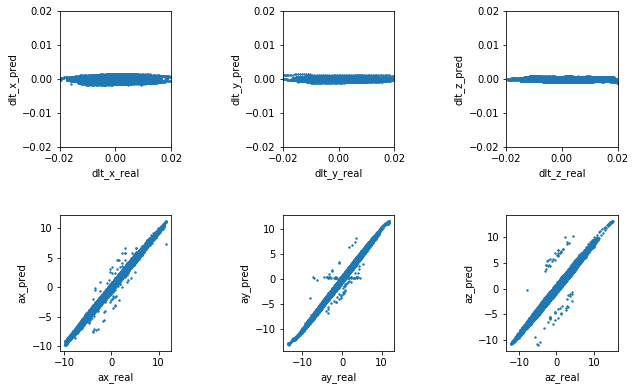

In [152]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(y_test_inverse.iloc[:,0], y_pred_inverse.iloc[:,0], s= 2)
ax1.set_xlabel('dlt_x_real')
ax1.set_ylabel('dlt_x_pred')
ax1.set_xlim((-0.02, 0.02))
ax1.set_ylim((-0.02, 0.02))

ax2.scatter(y_test_inverse.iloc[:,1], y_pred_inverse.iloc[:,1], s= 2)
ax2.set_xlabel('dlt_y_real')
ax2.set_ylabel('dlt_y_pred')
ax2.set_xlim((-0.02, 0.02))
ax2.set_ylim((-0.02, 0.02))

ax3.scatter(y_test_inverse.iloc[:,2], y_pred_inverse.iloc[:,2], s= 2)
ax3.set_xlabel('dlt_z_real')
ax3.set_ylabel('dlt_z_pred')
ax3.set_xlim((-0.02, 0.02))
ax3.set_ylim((-0.02, 0.02))

ax4.scatter(y_test_inverse.iloc[:,3], y_pred_inverse.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(y_test_inverse.iloc[:,4], y_pred_inverse.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(y_test_inverse.iloc[:,5], y_pred_inverse.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

In [96]:
max(model.get_weights())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print('rmse:', np.sqrt(mean_squared_error(y_test_inverse, y_pred_dlt_inverse)))
print('mae:', mean_absolute_error(y_test_inverse, y_pred_dlt_inverse))
print('r2:', r2_score(y_test_inverse, y_pred_dlt_inverse))

In [175]:
#예측
y_pred = pd.DataFrame(model.predict(x_test))

In [176]:
now_data = raw_data.loc[(raw_data['time'] >= 1400) & (raw_data['time'] <= 1998)].reset_index(drop=True)
next_data = raw_data.loc[(raw_data['time'] >= 1401) & (raw_data['time'] <= 1999)].reset_index(drop=True)

next_position = pd.DataFrame(np.array(now_data[['px','py','pz']]) + np.array(y_pred.iloc[:,0:3]), columns=['px_pred','py_pred','pz_pred'])

predicted_df = pd.concat([next_position, y_pred.iloc[:,3:]], axis = 1)

exc_x_idx_test, = np.where(abs(next_data['px'] - predicted_df['px_pred']) > 12)
exc_y_idx_test, = np.where(abs(next_data['py'] - predicted_df['py_pred']) > 12)
exc_z_idx_test, = np.where(abs(next_data['pz'] - predicted_df['pz_pred']) > 12)

exc_idx_test = set(exc_x_idx_test) | set(exc_y_idx_test) | set(exc_z_idx_test)

next_data = next_data.loc[next_data.index.drop(list(exc_idx_test))].reset_index(drop=True)
predicted_df = predicted_df.loc[predicted_df.index.drop(list(exc_idx_test))].reset_index(drop=True)

print('rmse:', np.sqrt(mean_squared_error(next_data.iloc[:,2:5], predicted_df.iloc[:,0:3])))
print('mae:', mean_absolute_error(next_data.iloc[:,2:5], predicted_df.iloc[:,0:3]))
print('r2:', r2_score(next_data.iloc[:,2:5], predicted_df.iloc[:,0:3]))

rmse: 0.022447809731954316
mae: 0.0168962853763136
r2: 0.9999640118536841


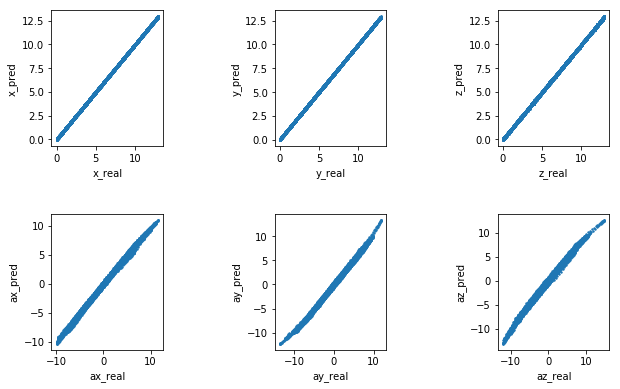

In [177]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(next_data.iloc[:,2], predicted_df.iloc[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(next_data.iloc[:,3], predicted_df.iloc[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(next_data.iloc[:,4], predicted_df.iloc[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(next_data.iloc[:,5], predicted_df.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(next_data.iloc[:,6], predicted_df.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(next_data.iloc[:,7], predicted_df.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

# sadfsd

## asdas

*sadfsadfas*

**sfsdfasd**